In [1]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Reading the dataset
df = pd.read_csv('911.csv')

In [37]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


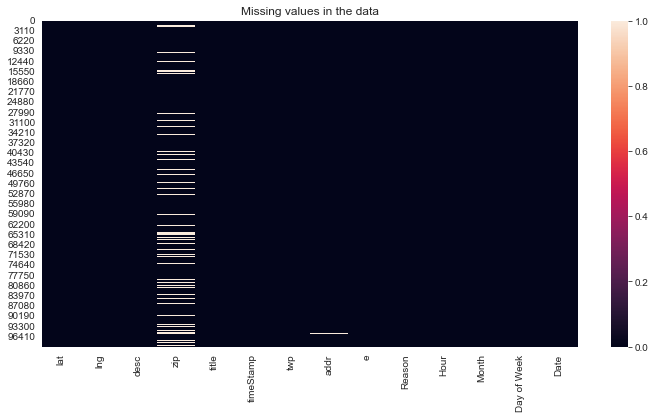

In [109]:
plt.figure(figsize=(12, 6))
plt.title('Missing values in the data')
sns.heatmap(df.isnull())
plt.show()

In [38]:
sns.set_style('darkgrid')

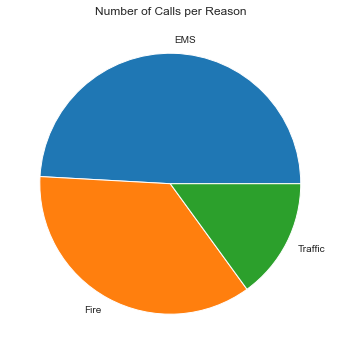

In [77]:
plt.figure(figsize=(10, 6))
plt.title('Number of Calls per Reason')
patches, texts = plt.pie(df['Reason'].value_counts(), labels=df['Reason'].unique())
plt.show()

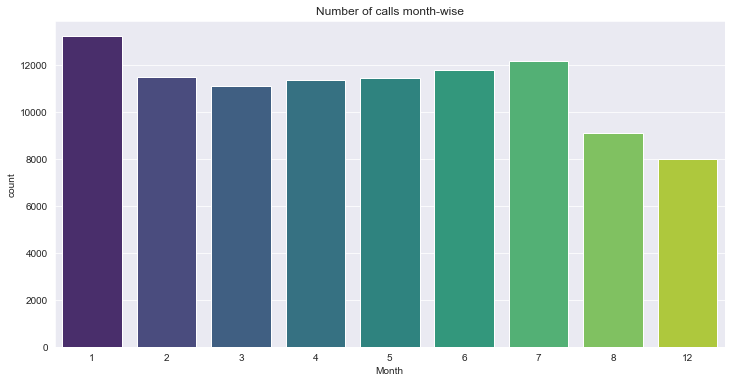

In [104]:
plt.figure(figsize=(12, 6))
plt.title('Number of calls month-wise')
sns.countplot(x=df['Month'], palette='viridis')
plt.show()

In [45]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [47]:
df['Date'] = df['timeStamp'].apply(lambda t : t.date())

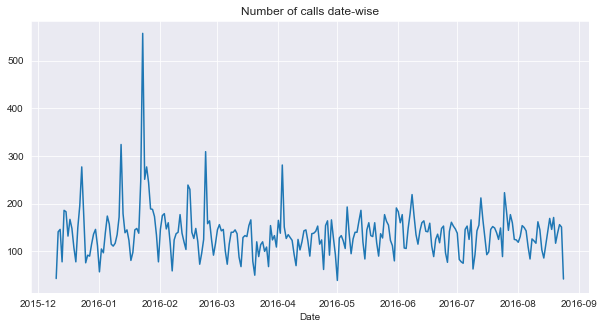

In [79]:
plt.figure(figsize=(10, 5))
plt.title('Number of calls date-wise')
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.show()

In [89]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['lat'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


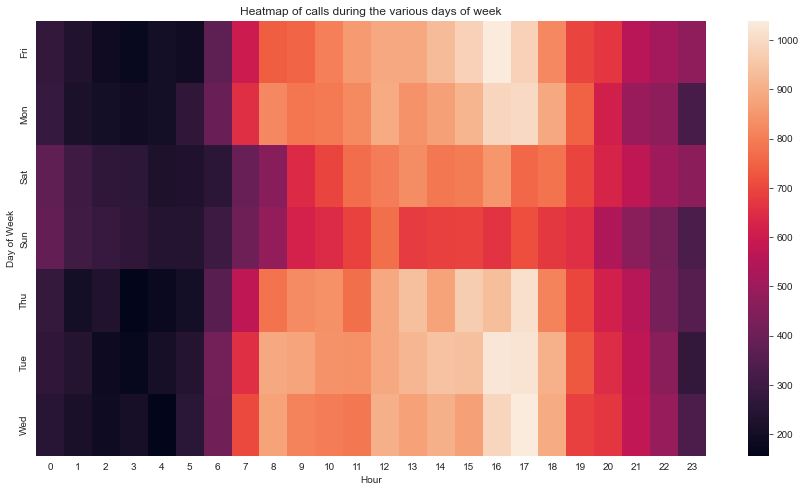

In [95]:
plt.figure(figsize=(15, 8))
plt.title('Heatmap of calls during the various days of week')
sns.heatmap(dayHour)
plt.show()